In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [23]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,1.606360e+11,2.184353e+06,60.434503,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.180461e+06,3.866841e+10,2.913639e+08,43400.369940,0.353168,0.842259,689.561322,4.964264,2.924141e+06,3.714886e+11,5.669939e+06,117.534341,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,2.527738e+00,0.000000e+00,0.000000,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.536962e+06,5.363081e+07,2.968431e+05,801.500000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,1.591075e+06,4.659125e+04,9.512541,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.237281e+07,3.346869e+09,1.024046e+07,15782.500000,0.196022,0.000000,375.000000,7.900000,2.176189e+04,2.621404e+09,8.716363e+05,20.568076,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.517080e+07,8.075525e+09,2.932135e+07,57426.500000,0.676065,0.000000,1232.995223,10.150000,1.035363e+06,1.200000e+11,1.827683e+06,50.305560,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,2.600000e+12,5.319158e+07,1495.946477,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [4]:
import seaborn as sns
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,0.916937,0.986732,0.806595,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,0.497603,0.383108,0.472122,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,0.918065,0.985417,0.807109,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,0.754650,0.875005,0.733812,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,0.841630,0.622620,0.745205,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,0.704751,0.505197,0.654309,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,-0.092185,-0.052337,-0.095724,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,0.692416,0.505025,0.672839,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,0.368166,0.248290,0.416289,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,0.990243,0.879517,0.808587,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


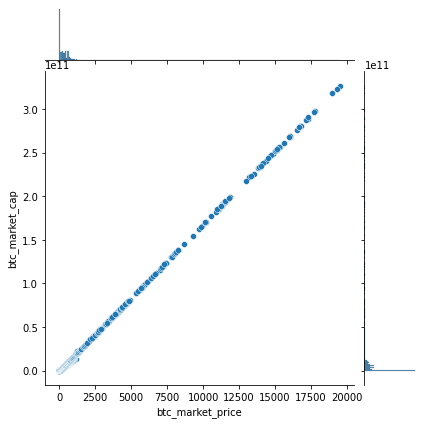

In [6]:
sns.jointplot(df['btc_market_price'],df['btc_market_cap'])

In [8]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [20]:
df.fillna(df.mean(),inplace=True)

In [22]:
df['btc_total_bitcoins'].fillna(df['btc_total_bitcoins'].mean(),inplace=True)

In [29]:
features = ["btc_total_bitcoins", "btc_difficulty", "btc_transaction_fees", "btc_n_unique_addresses"]
X = df[features]
y = df['btc_market_price']

In [43]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr_pred = lr.predict(val_X)

In [46]:
from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(val_y,lr_pred)
lr_mae

413.3762578229325